### Classification Models

In [294]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import torch

In [295]:
import sklearn
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)



In [296]:
len(X)

1000

In [297]:
len(y)

1000

In [298]:
print(f"First 5 samples of X:/n{X[:5]}")
print(f"FIrst 5 samples of y:/n {y[:5]}")


First 5 samples of X:/n[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
FIrst 5 samples of y:/n [1 1 1 1 0]


In [299]:
circles=pd.DataFrame({"X1":X[:,0],
                      "X2":X[:,1],
                      "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


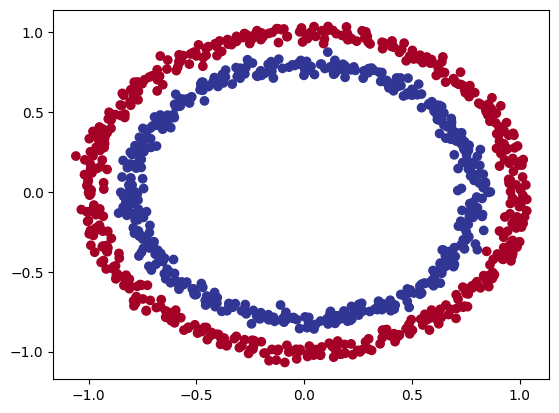

In [300]:
import matplotlib.pyplot as plt 
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

### Check Input and Output Shapes

In [301]:
X.shape,y.shape

((1000, 2), (1000,))

In [302]:
#View the first example of feature and labels
X_sample=X[0]
y_sample=y[0]
print(f"Values for one sample of X:{X_sample} and the same for y:{y_sample}")
print(f"Shapes for one sample of X:{X_sample.shape} and the same for y:{y_sample.shape}")

Values for one sample of X:[0.75424625 0.23148074] and the same for y:1
Shapes for one sample of X:(2,) and the same for y:()


In [303]:
## Turn data into tensors
torch.__version__


'2.1.2+cu118'

In [304]:
X=torch.from_numpy(X).type(torch.float)


In [305]:
y=torch.from_numpy(y).type(torch.float)

In [306]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [307]:
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [308]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [309]:
len(X_train),len(X_test)

(800, 200)

In [310]:
len(y_train),len(y_test)

(800, 200)

In [311]:
from torch import nn
device="cuda" if torch.cuda.is_available() else "cpu"

In [312]:
device

'cuda'

In [313]:
#1. Construct a model that subclass 
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #Create 2 nn.Linear which are capable of handling the shapes of the data
        self.layer_1=nn.Linear(in_features=2,out_features=5)
        self.layer_2=nn.Linear(in_features=5,out_features=1)

    def forward(self,x):
        return self.layer_2(self.layer_1(x))#  x->layer_1->layer_2->output

model_0=CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [314]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188]], device='cuda:0', requires_grad=True)

In [315]:
## Replicating using nn.Sequential
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [316]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [317]:
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
print("Length of the predictions: {len(untrained_preds)},Shape:{untrained_preds.shape}")
print(f"Lenght of test samples: {len(X_test)},Shape:{y_test.shape}")
print(f"First 10 predictions:\n{untrained_preds[:10]}")
print(f"Firest 10 labels:\n{y_test[:10]}")


Length of the predictions: {len(untrained_preds)},Shape:{untrained_preds.shape}
Lenght of test samples: 200,Shape:torch.Size([200])
First 10 predictions:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')
Firest 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [318]:
X_test[:10],y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### Selecting the Loss Function and the Optimizer


In [319]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [320]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [321]:
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc
    
    


### Training the Model 

In [322]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [323]:
model_0.eval()
with torch.inference_mode():
 y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [324]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [325]:
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [326]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [327]:
device

'cuda'

In [328]:
torch.manual_seed(42)

In [329]:
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

#### Building Train and the test loop

In [330]:
epochs=1000

for epoch in range(epochs):
    model_0.train()
    y_logits=model_0(X_train).squeeze()
    y_pred=torch.sigmoid(y_logits).squeeze()
    y_pred_labels=torch.round(y_pred).squeeze()
    loss=loss_fn(y_logits,y_train)
    accuracy=accuracy_fn(y_true=y_train,y_pred=y_pred_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # For Testing
    model_0.eval()
    with torch.inference_mode():
        test_logits=model_0(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))
        
        test_loss=loss_fn(test_logits,y_test)
        test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

    if epoch%10==0:
        print(f"Epoch:{epoch} | Loss:{loss:.5f}, |Accuracy:{accuracy:.5f},| Test_Acc:{test_acc:.2f} | Test loss:{test_loss:.5f}")
        




Epoch:0 | Loss:0.69796, |Accuracy:51.87500,| Test_Acc:58.00 | Test loss:0.69440
Epoch:10 | Loss:0.69590, |Accuracy:51.25000,| Test_Acc:53.00 | Test loss:0.69305
Epoch:20 | Loss:0.69490, |Accuracy:51.62500,| Test_Acc:49.50 | Test loss:0.69254
Epoch:30 | Loss:0.69435, |Accuracy:51.12500,| Test_Acc:49.50 | Test loss:0.69236
Epoch:40 | Loss:0.69401, |Accuracy:50.87500,| Test_Acc:51.00 | Test loss:0.69232
Epoch:50 | Loss:0.69378, |Accuracy:50.25000,| Test_Acc:50.00 | Test loss:0.69234
Epoch:60 | Loss:0.69362, |Accuracy:50.00000,| Test_Acc:51.50 | Test loss:0.69239
Epoch:70 | Loss:0.69351, |Accuracy:50.25000,| Test_Acc:51.00 | Test loss:0.69246
Epoch:80 | Loss:0.69342, |Accuracy:49.87500,| Test_Acc:50.00 | Test loss:0.69254
Epoch:90 | Loss:0.69336, |Accuracy:49.87500,| Test_Acc:53.00 | Test loss:0.69262
Epoch:100 | Loss:0.69331, |Accuracy:49.25000,| Test_Acc:53.00 | Test loss:0.69271
Epoch:110 | Loss:0.69327, |Accuracy:49.75000,| Test_Acc:54.00 | Test loss:0.69279
Epoch:120 | Loss:0.69324, |

Epoch:420 | Loss:0.69300, |Accuracy:51.62500,| Test_Acc:47.50 | Test loss:0.69408
Epoch:430 | Loss:0.69300, |Accuracy:51.25000,| Test_Acc:47.50 | Test loss:0.69410
Epoch:440 | Loss:0.69300, |Accuracy:51.25000,| Test_Acc:47.50 | Test loss:0.69412
Epoch:450 | Loss:0.69300, |Accuracy:50.87500,| Test_Acc:47.00 | Test loss:0.69414
Epoch:460 | Loss:0.69300, |Accuracy:51.00000,| Test_Acc:47.00 | Test loss:0.69416
Epoch:470 | Loss:0.69300, |Accuracy:51.00000,| Test_Acc:47.00 | Test loss:0.69418
Epoch:480 | Loss:0.69300, |Accuracy:51.00000,| Test_Acc:47.00 | Test loss:0.69419
Epoch:490 | Loss:0.69299, |Accuracy:51.12500,| Test_Acc:47.00 | Test loss:0.69421
Epoch:500 | Loss:0.69299, |Accuracy:50.87500,| Test_Acc:47.00 | Test loss:0.69423
Epoch:510 | Loss:0.69299, |Accuracy:51.00000,| Test_Acc:47.00 | Test loss:0.69424
Epoch:520 | Loss:0.69299, |Accuracy:51.12500,| Test_Acc:47.00 | Test loss:0.69426
Epoch:530 | Loss:0.69299, |Accuracy:51.25000,| Test_Acc:46.50 | Test loss:0.69427
Epoch:540 | Loss

### Make Predictions and evaluate the model

In [331]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:  
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


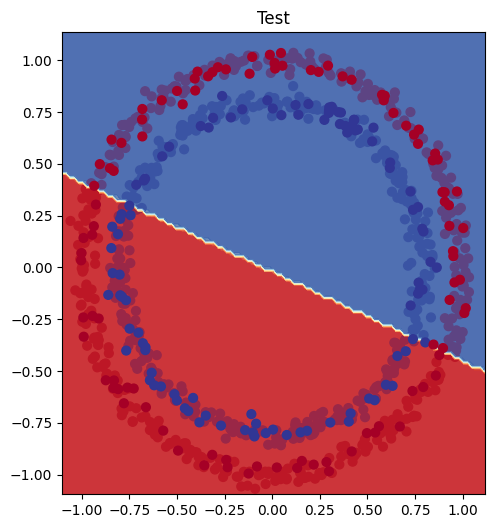

In [332]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)


### Improving a Model

In [333]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=2)

    def forward(self,x):
        z=self.layer_1(x)
        z=self.layer_2(z)
        z=self.layer_3(z)
        return z
        

In [334]:
model_1=CircleModelV1().to(device)

In [335]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=2, bias=True)
)

In [336]:
# Create a Loss Function
loss_fn=nn.BCEWithLogitsLoss()
# Create an Optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)



In [337]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [338]:
len(y_train),len(y_logits),len(y_test),len(X_train),len(X_test)

(800, 800, 200, 800, 200)

In [339]:

# epochs=1000
# X_train,y_train=X_train.to(device),y_train.to(device)
# X_test,y_test=X_test.to(device),y_train.to(device)

# for epoch in range(epochs):
#     model_1.train()
#     y_logits=model_1(X_train)
#     y_pred=torch.round(torch.sigmoid(y_logits))
#     loss=loss_fn(y_logits,y_train)
#     acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     model_1.eval()
#     with torch.inference_mode():
#         test_logits=model_1(X_test).squeeze()
#         test_pred=torch.round(torch.sigmoid(test_logits))
#         test_loss=loss_fn(test_logits,y_test)
#         test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
    
#     if(epoch%10==0):
#         print(f"loss:{loss:.2f} | Accuracy:{acc:.5f} | Test_loss:{test_loss:.5f} | Test_Accuracy:{test_acc:.5f}")
    


In [340]:
# torch.manual_seed(42)

# epochs = 1000 # Train for longer

# # Put data to target device
# X_train, y_train = X_train.to(device), y_train.to(device)
# X_test, y_test = X_test.to(device), y_test.to(device)

# for epoch in range(epochs):
#     ### Training
#     # 1. Forward pass
#     y_logits = model_1(X_train).squeeze()
#     y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

#     # 2. Calculate loss/accuracy
#     loss = loss_fn(y_pred, y_train)
#     acc = accuracy_fn(y_true=y_train, 
#                       y_pred=y_pred)

#     # 3. Optimizer zero grad
#     optimizer.zero_grad()

#     # 4. Loss backwards
#     loss.backward()

#     # 5. Optimizer step
#     optimizer.step()

#     ### Testing
#     model_1.eval()
#     with torch.inference_mode():
#         # 1. Forward pass
#         test_logits = model_1(X_test).squeeze() 
#         test_pred = torch.round(torch.sigmoid(test_logits))
#         # 2. Caculate loss/accuracy
#         test_loss = loss_fn(test_logits,
#                             y_test)
#         test_acc = accuracy_fn(y_true=y_test,
#                                y_pred=test_pred)

#     # Print out what's happening every 10 epochs
#     if epoch % 100 == 0:
#                 print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


### Preparing data to see if our model can fit a straight line

In [341]:
# Create some data (same as not)
weight=0.7
bias=0.3
start=0
end=1
step=0.01

# Create data 
X_regression=torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression+bias # Linear regression formuale (withouot epsilon)
print(len(X_regression))
X_regression[:5],y_regression[:5]



100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [342]:
train_split=int(0.8*len(X_regression))
X_train_regression,y_train_regression=X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression=X_regression[train_split:],y_regression[train_split:]
len(X_train_regression),len(X_test_regression),len(y_train_regression),len(y_test_regression)


(80, 20, 80, 20)

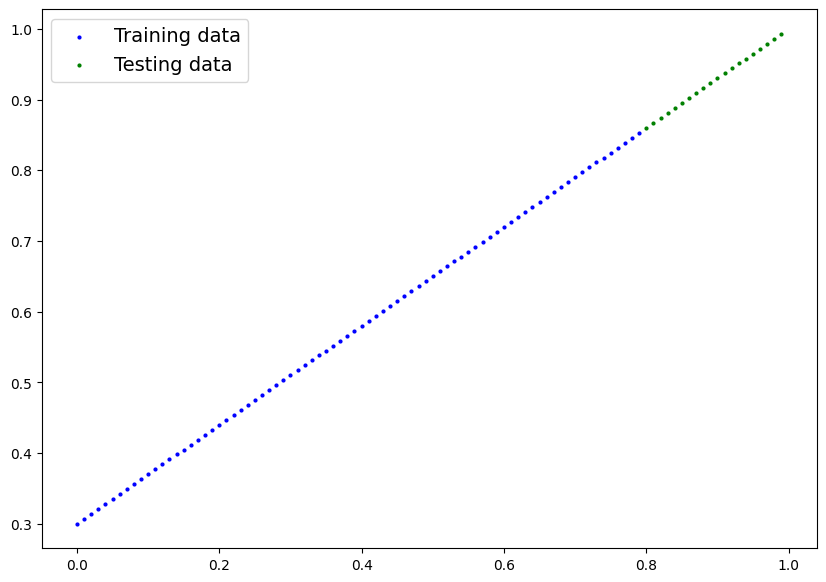

In [343]:
plot_predictions(train_data=X_train_regression,train_labels=y_train_regression,test_data=X_test_regression,test_labels=y_test_regression)

In [344]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=2, bias=True)
)

In [345]:
model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [346]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.01)


In [347]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [348]:
epochs=1000
X_train_regression,y_train_regression=X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression=X_test_regression.to(device),y_test_regression.to(device)


In [349]:
# Training
for epoch in range(epochs):
    y_pred=model_2(X_train_regression)
    loss=loss_fn(y_pred,y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Testing 
    model_2.eval()
    with torch.inference_mode():
      test_pred=model_2(X_test_regression)
      test_loss=loss_fn(test_pred,y_test_regression)

      # Print out What's happening
      if epoch%100==0:
         print(f"Epoch:{epoch} | Loss:{loss:.5f} | Test Loss:{test_loss}")



Epoch:0 | Loss:0.75986 | Test Loss:0.9110288619995117
Epoch:100 | Loss:0.02858 | Test Loss:0.0008127093315124512


Epoch:200 | Loss:0.02533 | Test Loss:0.00209200382232666
Epoch:300 | Loss:0.02137 | Test Loss:0.003050935221835971
Epoch:400 | Loss:0.01964 | Test Loss:0.0034076273441314697
Epoch:500 | Loss:0.01940 | Test Loss:0.003872442292049527
Epoch:600 | Loss:0.01903 | Test Loss:0.0037889957893639803
Epoch:700 | Loss:0.01878 | Test Loss:0.003813284682109952
Epoch:800 | Loss:0.01840 | Test Loss:0.0032871782314032316
Epoch:900 | Loss:0.01798 | Test Loss:0.0036036730743944645


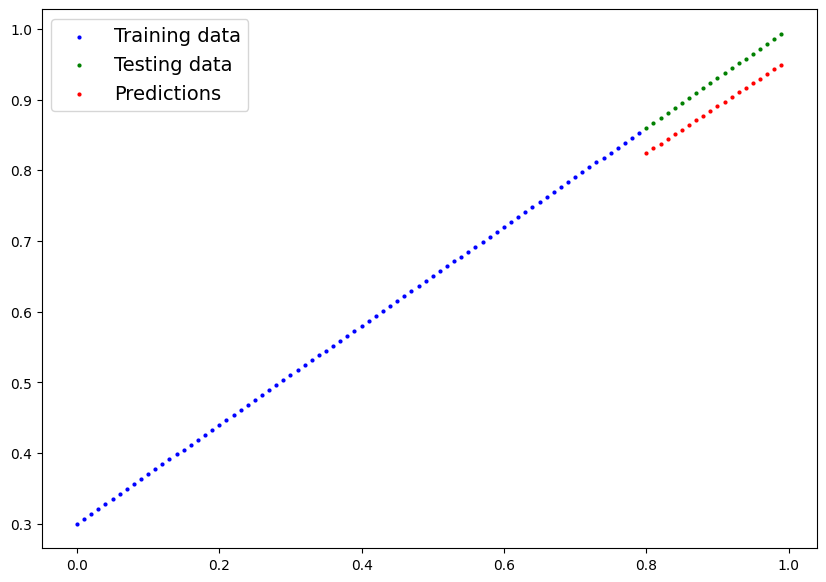

In [350]:
# Turn on evaluation mode
model_2.eval()

with torch.inference_mode():
    y_preds=model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),train_labels=y_train_regression.cpu(),test_data=X_test_regression.cpu(),test_labels=y_test_regression.cpu(),predictions=y_preds.cpu())


## Non Linearity

#### Recreating non -Linear Data(red and blue circles)

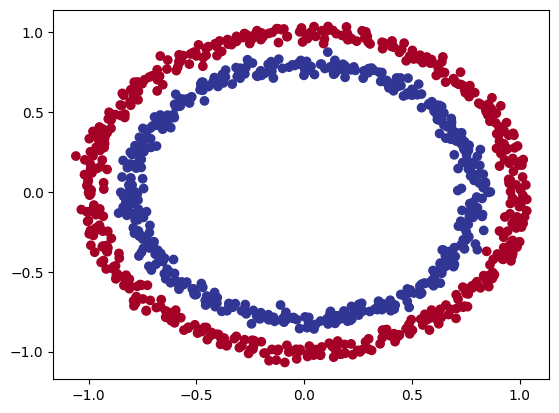

In [351]:
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [352]:
# Convert data to tensors and them to train and test splits.
import torch
from sklearn.model_selection import train_test_split 
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [353]:
X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### Building a Model with Non Linearity


In [354]:
from torch import nn
class CircleModelV3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
        self.relu=nn.ReLU() #relu is non-linear activation function.
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_3=CircleModelV3().to(device)
model_3


CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [355]:
## Setup loss and optimizer
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model_3.parameters(),lr=0.1)


(200, 200)

In [363]:
# Traiining the model with non-Linearity
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data on the target device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

epochs=1000

for epoch in range(epochs):
    model_3.train()

    # 1.Forward pass
    y_logits=model_3(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))# logits->preiction probability ->prediction labels

    # 2.Calaculate the Loss function.
    loss=loss_fn(y_logits,y_train)  
    

   # 3.Optimize 
    optimizer.zero_grad()

    # 4.Loss Backward
    loss.backward()

    # 5.Step the optimizer
    optimizer.step()

    # Testing 
    model_3.eval()
    with torch.inference_mode():
      test_logits=model_3(X_test).squeeze()
      test_pred=torch.round(torch.sigmoid(test_logits))
      test_loss=loss_fn(test_logits,y_test)
      test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
      

      # Print out What's happening
      if epoch%100==0:
         print(f"Epoch:{epoch} | Loss:{loss:.5f} | Test Loss:{test_loss} | Acc:{test_acc:.2f}")







Epoch:0 | Loss:0.56451 | Test Loss:0.5706386566162109 | Acc:88.00
Epoch:100 | Loss:0.47643 | Test Loss:0.49515920877456665 | Acc:90.00
Epoch:200 | Loss:0.36470 | Test Loss:0.4009029269218445 | Acc:92.50
Epoch:300 | Loss:0.24951 | Test Loss:0.2982487082481384 | Acc:96.50
Epoch:400 | Loss:0.16865 | Test Loss:0.21778880059719086 | Acc:97.50
Epoch:500 | Loss:0.11998 | Test Loss:0.16288840770721436 | Acc:99.00
Epoch:600 | Loss:0.09001 | Test Loss:0.12586115300655365 | Acc:99.50
Epoch:700 | Loss:0.07021 | Test Loss:0.10222915560007095 | Acc:99.50
Epoch:800 | Loss:0.05719 | Test Loss:0.08603105694055557 | Acc:99.50
Epoch:900 | Loss:0.04814 | Test Loss:0.07422830909490585 | Acc:99.50


In [364]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.9302,  1.5249],
                      [-0.5239,  1.9241],
                      [-0.1549,  0.1427],
                      [-2.3412, -0.1773],
                      [ 0.6894, -2.3675],
                      [ 1.2322, -0.0741],
                      [ 1.6353,  0.1063],
                      [ 0.3410, -0.0998],
                      [ 0.8669,  0.7074],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.2411, -0.9013, -0.2872, -0.4229, -0.5652, -0.5753, -0.7358, -0.4252,
                      -0.2222, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0312, -0.7222,  0.2441, -0.3388, -0.4144, -0.0501, -0.2317,  0.2555,
                       -0.1172, -0.0997],
                      [ 1.5935,  1.8744,  0.1331,  2.1408,  2.0973,  1.0262,  1.5382,  0.0566,
                        0.9803, -0.1927],
                      [-0.3130, -0.124

### 6.4 Evaluatiing a mmodel trained with Non-Linear Activation Functions

In [365]:
model_3.eval()
with torch.inference_mode():
    y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

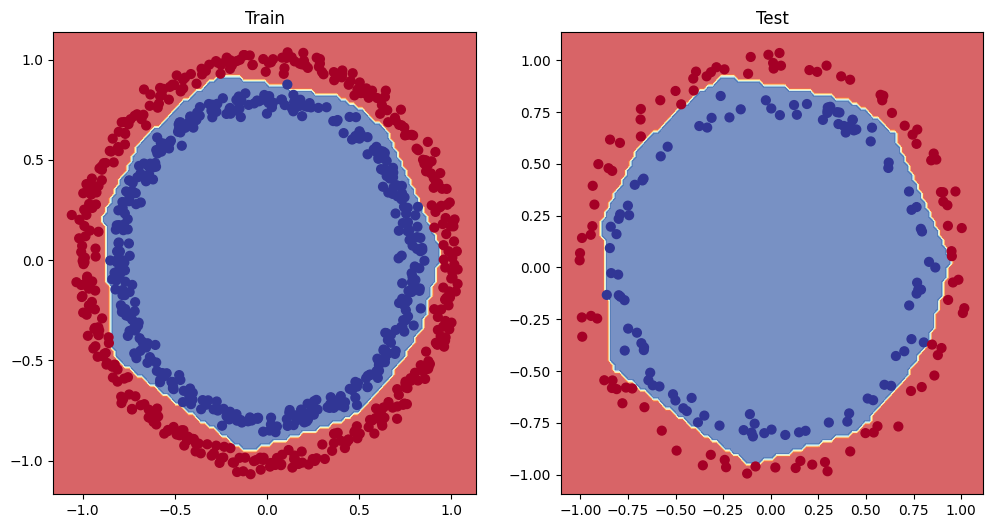

In [366]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)


### 7. Replicating the non-linear activation functions


In [367]:
A=torch.arange(-10,10,1,dtype=torch.float32)
A.dtype


torch.float32

In [368]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

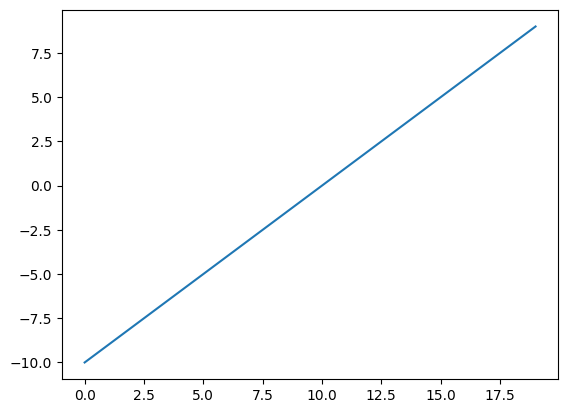

In [370]:
plt.plot(A)

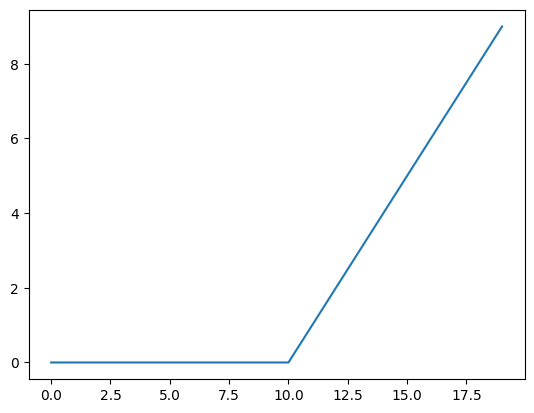

In [372]:
plt.plot(torch.relu(A))

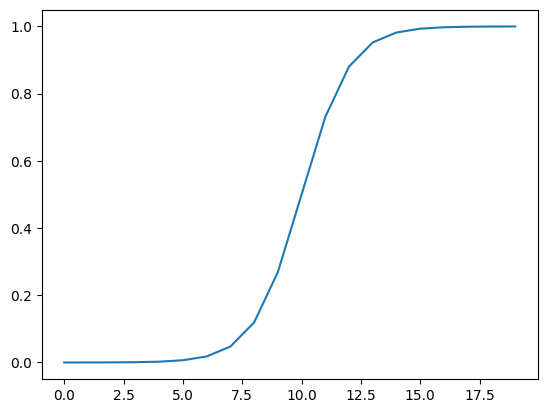

In [374]:
plt.plot(torch.sigmoid(A))

### Putting all together with a multiclassification problem

### Creating a toy multiclass dataset

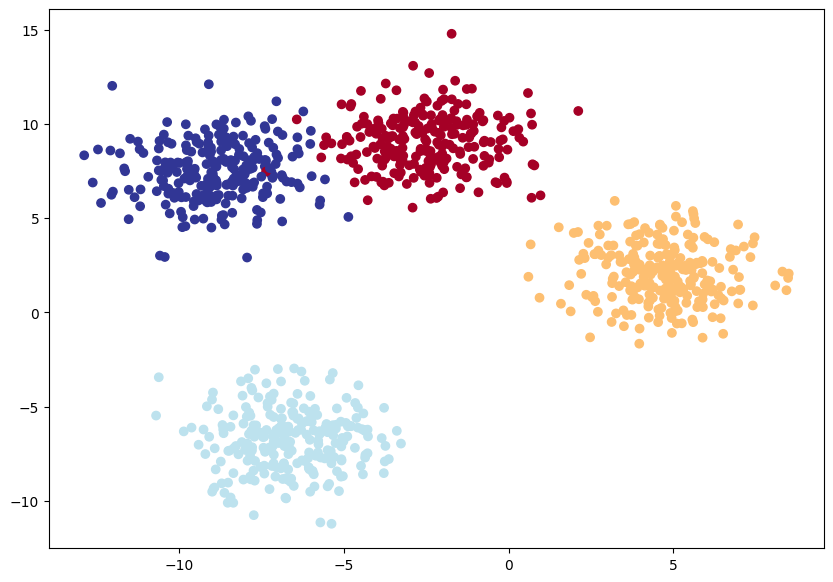

In [382]:
import torch
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Setting the Hyperparameters
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42
X_blob,y_blob=make_blobs(n_samples=1000,n_features=NUM_FEATURES,centers=NUM_CLASSES,cluster_std=1.5,random_state=RANDOM_SEED)
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.float)

# Split into train and test
X_blob_train,X_blob_test,y_blob_train,y_blob_test=train_test_split(X_blob,y_blob,test_size=0.20,random_state=RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)